In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Rules:
- The player pays $1 to play and picks a number.
- The House rolls 3 dice at once.

- Payouts:
  - \$3 if all three dice match the chosen number
  - \$2 if exactly two dice match the chosen number
  - \$1 is exactly one of the dice matches the chosen number
  - If none of the dice match the player's chosen number, then the House keeps the \$1.




Exercises:
- What are your chances of getting an outcome payout of \\$2? (where we earned \\$3 on the \$1 ante)


In [2]:
print(f"The mathematical chances of this happening are 1/6 cubed or {round((1/(6**3))*100, 3)}%.")

The mathematical chances of this happening are 1/6 cubed or 0.463%.


In [3]:
n_trials = 1000000
n_dice = 3
choice_range = np.arange(1,7)

dice_rolls = np.random.choice(choice_range, size = (n_trials, n_dice))
chosen_number = np.random.choice(choice_range)


def check_for_selection(rows, random_numb):
    correct = 0
    for number in rows:
        if number == chosen_number:
                correct += 1            
    return correct

df = pd.DataFrame(dice_rolls)
correct = df.apply(check_for_selection, random_numb = chosen_number, axis =1)
all_correct = round((correct == 3).mean(),6)
print(f"The experimental results of 1 million trials shows the chance of gettting a $2 payout (meaning you got all 3 dice to roll as your selected number is {all_correct*100}%.")

The experimental results of 1 million trials shows the chance of gettting a $2 payout (meaning you got all 3 dice to roll as your selected number is 0.4639%.


- What are your chances of getting an payout of \$1?


In [4]:
print(f"The mathematical chances of this happening are (1/6) * (1/6) * (5/6) * (3) or {round((1/6)*(1/6)*(5/6)*3*100, 3)}%.")

The mathematical chances of this happening are (1/6) * (1/6) * (5/6) * (3) or 6.944%.


In [5]:
two_correct = round((correct == 2).mean(),6)
print(f"The experimental results of 1 million trials shows the chance of gettting a $1 payout (meaning you got 2 dice to roll as your selected number is {two_correct*100}%.")

The experimental results of 1 million trials shows the chance of gettting a $1 payout (meaning you got 2 dice to roll as your selected number is 6.9705%.


- What are your chances of getting a payout of \\$0 where you ante \\$1 and win \$1?


In [6]:
print(f"The mathematical chances of this happening are are (1/6) * (5/6) * (5/6) * (3) or {round((1/6)*(5/6)*(5/6)*3*100, 3)}%.")

The mathematical chances of this happening are are (1/6) * (5/6) * (5/6) * (3) or 34.722%.


In [7]:
one_correct = round((correct == 1).mean(),6)

print(f"The experimental results of 1 million trials shows the chance of gettting a $0 payout (meaning you got 1 die to roll as your selected number is {one_correct*100}%.")

The experimental results of 1 million trials shows the chance of gettting a $0 payout (meaning you got 1 die to roll as your selected number is 34.7193%.


- What are your chances of getting a payout of -$1 where you ante up, but don't win anything?


In [8]:
print(f"The mathematical chances of this happening are 5/6 cubed or {round(((5/6)**3)*100, 3)}%.")

The mathematical chances of this happening are 5/6 cubed or 57.87%.


In [9]:
none_correct = round((correct == 0).mean(),6)
print(f"The experimental results of 1 million trials shows the chance of gettting a $-1 payout (meaning you got 0 die to roll as your selected number is {none_correct*100}%.")

The experimental results of 1 million trials shows the chance of gettting a $-1 payout (meaning you got 0 die to roll as your selected number is 57.84629999999999%.


- What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)


In [10]:
print(f"The mathematical avg gain per game is ($0 * .34722) + ($1 * .06944) + ($2 * 0.00472) + ($-1 * .5787) or ${(0 * .34722) + (1 * .06944) + (2 * 0.00472) + (-1 * .5787)}.")

The mathematical avg gain per game is ($0 * .34722) + ($1 * .06944) + ($2 * 0.00472) + ($-1 * .5787) or $-0.49982.


In [11]:
print(f"The experimental results of 1 million trials show the avg gain per game is ${(0*one_correct)+(1*two_correct)+(2*all_correct)+(-1*none_correct)}.")

The experimental results of 1 million trials show the avg gain per game is $-0.4994799999999999.


- Chart out a histogram of all the outcomes of those 1,000,000 games


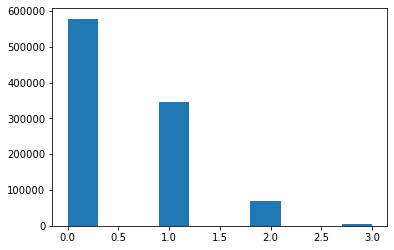

In [12]:
plt.hist(correct);

- Is this really a fair game of 1/6 + 1/6 + 1/6 odds?

Absolutely not!

- If you play 1,000,000 games in a row, what are your winnings/losses?

In [13]:
def winnings(x):
    total = 0
    if x == 0:
        total -= 1
    elif x == 2:
        total += 1
    elif x == 3:
        total += 2
    return total

total_winnings = correct.apply(winnings).sum()


print(f"The experimental results of 1 million trials show a gain of ${total_winnings}.")

The experimental results of 1 million trials show a gain of $-499480.
